<a href="https://colab.research.google.com/github/gagan-iitb/CS550/blob/main/Handouts/Regression_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Animated visualization of non-parametric Regression using KNN (with smoothing).**

In [1]:
import numpy as np
import matplotlib.animation
import matplotlib.pyplot as plt
from math import factorial


# Hyperparameters, change according to your need
n = 75
k = 5
estimator = "mean"
steps = 250
m, c = 2, 5
noise_mu, noise_sigma = 0, 0.2


plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 130
plt.ioff()
fig, ax = plt.subplots()

x = np.random.random((n, 1))
x = np.sort(x, axis=0)
y = x * m + c + np.random.normal(noise_mu, noise_sigma, size=(n, 1))

out_x, out_y = [], []
y_range = np.linspace(min(y), max(y), 10).reshape(-1, )


def animate(t):
    point = t / steps
    all_distances = []
    colors = ["teal"] * n
    sizes = [3] * n

    for ind, j in enumerate(x):
        all_distances.append([abs(j - point), ind])
    all_distances.sort()
    all_distances = all_distances[:k]
    all_x, all_y = [], []
    for _, index in all_distances:
        all_x.append(x[index])
        all_y.append(y[index])
        colors[index] = "red"
        sizes[index] = 9
    out_x.append(point)
    all_y = np.array(all_y)
    if estimator == "mean": out_y.append(np.mean(all_y))
    else: out_y.append(np.median(all_y))
    
    ax.collections.clear()
    plt.scatter(x, y, s=sizes, c=colors)
    plt.fill_betweenx(y_range, min(all_x), max(all_x), 
                      color='yellowgreen', alpha=0.2)
    plt.plot(out_x, out_y, 'b', linewidth=1)
    plt.xlim(-0.02, 1.02)


matplotlib.animation.FuncAnimation(fig, animate, frames=steps)

We will use, **Savitzky Golay Filter Smoothing** Function.
You can find detailed code & explaination in the scipy documentation [Cookbook/SavitzkyGolay](https://scipy.github.io/old-wiki/pages/Cookbook/SavitzkyGolay.html)

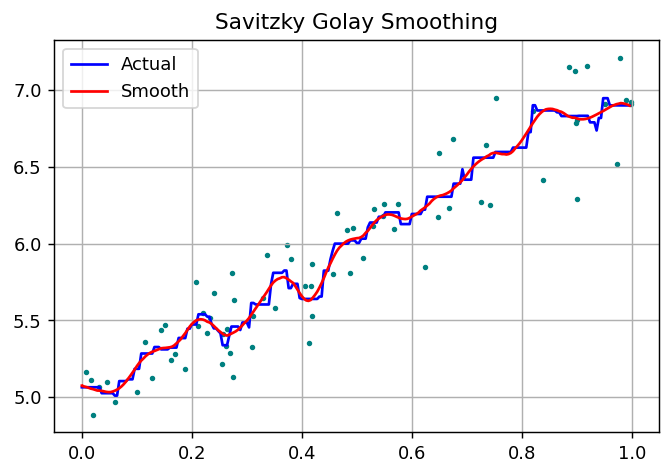

In [ ]:
# Code from -> https://scipy.github.io/old-wiki/pages/Cookbook/SavitzkyGolay.html

plt.cla()
plt.clf()
plt.close()

def savitzky_golay(y, window_size, order, deriv=0, rate=1):
    order_range = range(order + 1)
    half_window = (window_size - 1) // 2
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

# Change window_size & order to get different results
out_y_smooth = savitzky_golay(out_y, window_size=40, order=4)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, c="teal", s=4)
plt.plot(out_x, out_y, 'b', label="Actual")
plt.plot(out_x, out_y_smooth, 'r', label="Smooth", linewidth=1.5)
plt.title("Savitzky Golay Smoothing")
plt.legend()
plt.grid()
plt.show()